In [ ]:
#Respostas para as perguntas ANALISE DESCRITIVA AVANÇADA

#1 as evasões de cada departamento foram:
# Financeireo: 4, Marketing: 6, Operações: 4, Rh: 3, Ti: 1, Vendas: 3

#2 evasões pelo turno da tarde:
# o total de evasões no turno da tarde foi de 8.85%

#3 desvio padrão entre a tarde e a media geral:
# ha um desvio muito pequeno entre a méda geral e o turno da tarde

In [48]:
# Número total de evasões por departamento
evasoes = df[df['Evadiu'] == 'Sim']
display(evasoes.groupby('Departamento').size())

Departamento
Financeiro    4
Marketing     6
Operações     4
RH            3
TI            1
Vendas        3
dtype: int64

In [49]:
# considerando evasões apenas no turno da tarde
total_tarde = df[(df['Turno'] == 'Tarde')].shape[0]
evasoes_tarde = df[(df['Evadiu'] == 'Sim') & (df['Turno'] == 'Tarde')].shape[0]

porcentagem_evasoes_tarde = (evasoes_tarde * 100) / total_tarde

print(f'Porcentagem de evasões à tarde: {porcentagem_evasoes_tarde:.2f}%')

Porcentagem de evasões à tarde: 8.85%


In [50]:
# desvio padrão (usando a media para coparação)

desvio_padrao_turno = df.groupby('Turno')['Faltas'].std()

display(desvio_padrao_turno)

print(df.groupby('Turno')['Faltas'].mean())

Turno
Manhã    1.376872
Tarde    1.430269
Name: Faltas, dtype: float64

Turno
Manhã    1.905660
Tarde    1.911504
Name: Faltas, dtype: float64


In [ ]:
#Respostas para as perguntas ANALISE TEMPORAL

#1 mês com o maior numero de faltas:
# o mês de março conteve o maior número de faltas com 161 faltas, seguido de fevereiro com 134 faltas e janeiro com 123 faltas

#2 analise da semana com maior numero de faltas:
# a semana com o maior numero de faltas foi do dia 18 a 24 de Março, com 57 faltas 

#3 analise do dia com mais faltas:
# o dia que contem mais faltas é segunda-feira, contando com 146 faltas

In [51]:
# mes com o maior numero de faltas

df_falta = df
df_falta['Mes_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('M')
faltas_mes = df_falta.groupby('Mes_Falta')['Faltas'].sum()

display(faltas_mes)

Mes_Falta
2024-01    123.0
2024-02    134.0
2024-03    161.0
Freq: M, Name: Faltas, dtype: float64

In [52]:
# criando coluna com semanas aonde ha mais faltas 

df_falta['Semana_Ultima_Falta'] = df_falta['Data_Ultima_Falta'].dt.to_period('W')

faltas_por_semana = df_falta.groupby('Semana_Ultima_Falta')['Faltas'].sum()

display(faltas_por_semana.sort_values())

Semana_Ultima_Falta
2024-01-29/2024-02-04    21.0
2024-01-22/2024-01-28    23.0
2024-03-04/2024-03-10    24.0
2024-02-12/2024-02-18    29.0
2024-01-15/2024-01-21    30.0
2024-01-08/2024-01-14    30.0
2024-02-26/2024-03-03    31.0
2024-01-01/2024-01-07    33.0
2024-03-11/2024-03-17    33.0
2024-02-19/2024-02-25    33.0
2024-03-25/2024-03-31    36.0
2024-02-05/2024-02-11    38.0
2024-03-18/2024-03-24    57.0
Freq: W-SUN, Name: Faltas, dtype: float64

In [53]:
#cruzando dias das semanas com a quantidade de evasões

relacao_dia_da_semana_e_quantidade_evasoes = df_falta.groupby('Dia_da_Semana_Ultima_Falta')['Faltas'].sum()

ordem_dias_uteis = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
relacao_dia_da_semana_e_quantidade_evasoes = relacao_dia_da_semana_e_quantidade_evasoes.reindex(ordem_dias_uteis)

display(relacao_dia_da_semana_e_quantidade_evasoes)

Dia_da_Semana_Ultima_Falta
Segunda    146.0
Terça       59.0
Quarta      74.0
Quinta      78.0
Sexta       61.0
Name: Faltas, dtype: float64

In [54]:
#criando a coluna de riscos_evasao

df['Risco_Evasao'] = pd.cut(df['Faltas'], bins=[-1,2,5,16], labels=['Baixo', 'Moderado', 'Alto'])
df

,Nome,Departamento,Turno,Faltas,Dia_da_Semana_Ultima_Falta,Data_Ultima_Falta,Evadiu,Faltas_Suspeitas,Mes_Falta,Semana_Ultima_Falta,Risco_Evasao
0,Colaborador_001,Operações,Manhã,2.0,Quarta,2024-01-18,Sim,False,2024-01,2024-01-15/2024-01-21,Baixo
1,Colaborador_002,Operações,Manhã,1.0,Segunda,2024-03-20,Não,False,2024-03,2024-03-18/2024-03-24,Baixo
2,Colaborador_003,Vendas,Manhã,3.0,Segunda,2024-03-10,Não,False,2024-03,2024-03-04/2024-03-10,Moderado
3,Colaborador_004,Marketing,Manhã,3.0,Segunda,2024-01-21,Não,False,2024-01,2024-01-15/2024-01-21,Moderado
4,Colaborador_005,RH,Manhã,1.0,Quarta,2024-02-18,Não,False,2024-02,2024-02-12/2024-02-18,Baixo
...,...,...,...,...,...,...,...,...,...,...,...
214,Colaborador_215,Operações,Tarde,3.0,Segunda,2024-02-09,Não,False,2024-02,2024-02-05/2024-02-11,Moderado
215,Colaborador_216,Operações,Manhã,1.0,Segunda,2024-03-28,Não,False,2024-03,2024-03-25/2024-03-31,Baixo
216,Colaborador_217,Financeiro,Tarde,2.0,Segunda,2024-01-24,Não,False,2024-01,2024-01-22/2024-01-28,Baixo
217,Colaborador_218,RH,Tarde,1.0,Terça,2024-02-07,Não,False,2024-02,2024-02-05/2024-02-11,Baixo


In [55]:
#gerando tabela com a distribuição percentual de risco por departamento.

distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()
display(distribuicao)

C:\Users\44581098807\AppData\Local\Temp\ipykernel_18172\460168463.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Departamento', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Departamento,,,
Financeiro,26,9,0
Marketing,30,11,0
Operações,39,13,0
RH,21,10,0
TI,20,10,0
Vendas,20,9,1


In [57]:
# relação entre risco alto e turno da tarde
  # não há relação

distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()

display(distribuicao)

C:\Users\44581098807\AppData\Local\Temp\ipykernel_18172\2283820421.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao = df.groupby(['Turno', 'Risco_Evasao']).size().unstack()


Risco_Evasao,Baixo,Moderado,Alto
Turno,,,
Manhã,76,29,1
Tarde,80,33,0


Departamento
Financeiro    35
Marketing     41
Operações     52
RH            31
TI            30
Vendas        30
Name: Faltas, dtype: int64

Text(0, 0.5, 'Total de Faltas')

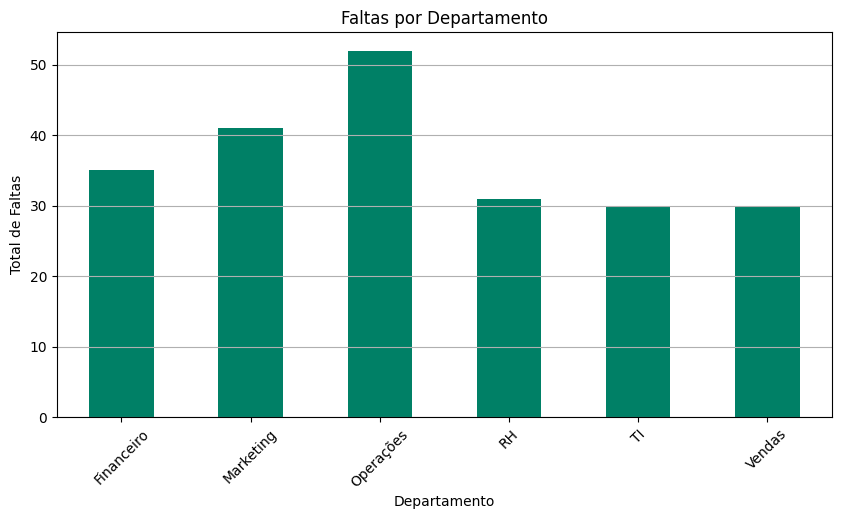

In [81]:
#Gráfico de barras: número de faltas por departamento.

faltas_departamento = df.groupby('Departamento')['Faltas'].size()
display(faltas_departamento)
faltas_departamento.plot(kind='bar', figsize=(10,5), colormap='summer')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.title('Faltas por Departamento')
plt.ylabel('Total de Faltas')

C:\Users\44581098807\AppData\Local\Temp\ipykernel_18172\311943943.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribuicao_geral_risco = df.groupby('Risco_Evasao').size()


(np.float64(-1.0999966360403255),
 np.float64(1.0999998398114441),
 np.float64(-1.0999989802562382),
 np.float64(1.099999008919067))

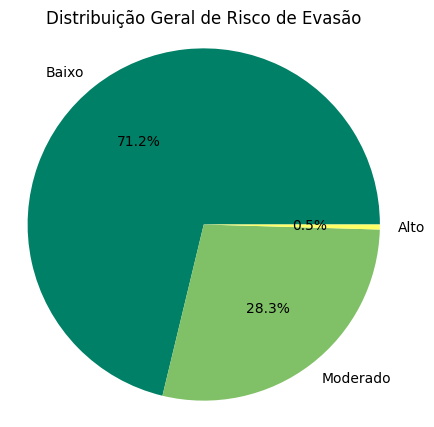

In [80]:
#Gráfico de pizza: distribuição de risco de evasão.

distribuicao_geral_risco = df.groupby('Risco_Evasao').size()


distribuicao_geral_risco.plot(kind='pie', figsize=(5,5), colormap='summer', subplots=True, autopct='%1.1f%%')
plt.title('Distribuição Geral de Risco de Evasão')
plt.axis('equal')


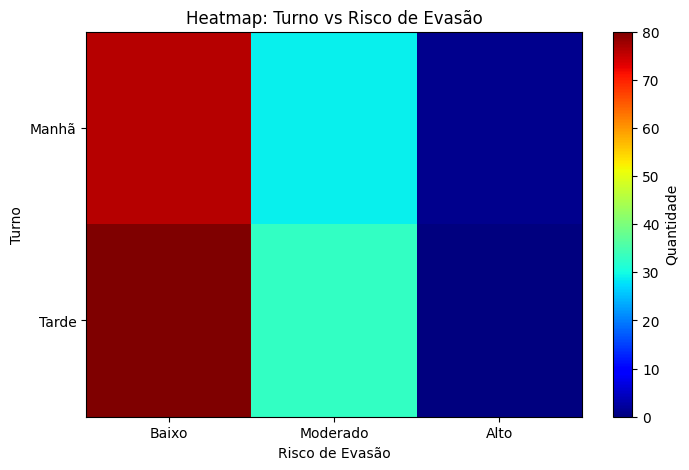

In [89]:
#Heatmap cruzando Turno e Risco_Evasao.

plt.figure(figsize=(8, 5))

plt.imshow(distribuicao, cmap='jet', aspect='auto')

plt.xticks(ticks=range(distribuicao.shape[1]), labels=distribuicao.columns)
plt.yticks(ticks=range(distribuicao.shape[0]), labels=distribuicao.index)

plt.colorbar(label='Quantidade')
plt.title('Heatmap: Turno vs Risco de Evasão')
plt.xlabel('Risco de Evasão')
plt.ylabel('Turno')
plt.show()
